Universidade Federal do Rio Grande do Sul (UFRGS)   
Programa de Pós-Graduação em Engenharia Civil (PPGEC)   

# PEC00025: Introduction to Vibration Theory


### Class 08 - Vibration analysis in frequency domain

[1.   Frequency preservation theorem](#section_1)  
[2.   Reological models](#section_2)  
[2.1. General linear model](#section_21)  
[2.2. The Kevin-Voigt model](#section_22)  
[2.3. The Maxwell model](#section_23)  
[2.4. The standard model](#section_24)  
[3.   Equilibrium in frequency domain](#section_3)  
[4.   Assignment](#section_4)  

---
_Prof. Marcelo M. Rocha, Dr.techn._ [(ORCID)](https://orcid.org/0000-0001-5640-1020)  
_Porto Alegre, RS, Brazil_ 

In [1]:
# Importing Python modules required for this notebook
# (this cell must be executed with "shift+enter" before any other Python cell)

import numpy as np
import matplotlib.pyplot as plt
from   MRPy import MRPy


## 1. Frequency preservation theorem <a name="section_1"></a> 

Let us assume now that our idealized single degree of freedom system is subjected to a harmonic
(sinusoidal) loading with frequency $f_0$:

$$ F(t) = F_{\rm max} \sin(2\pi f_0 t + \theta_F) $$

with $F_{\rm max}$ being the force function amplitude and $\theta$ some phase angle.

<img src="images/singleDOF.png" alt="SDOF system" width="240px"/>

Recalling the convolution theorem for Fourier Transform presented in last class we anticipate that, 
in the same way as with Laplace Transform, the system response can calculated as:

$$ u(t) = f(t) * h(t) = \int_{-\infty}^{\infty} {f(t - \tau}) h(\tau) \,  \; d\tau $$

with $f(t) = F(t)/m$. Deriving now the displacement twice we got the acceleration:

$$ \ddot{u}(t) = \int_{-\infty}^{\infty} {\ddot{f}(t - \tau}) h(\tau) \,  \; d\tau $$

but replacing the sinusoidal function we get:

$$ \ddot{u}(t) = -(2\pi f_0)^2 \int_{-\infty}^{\infty} {f(t - \tau}) h(\tau) \,  \; d\tau $$

Replacing now the integral in the expression above by $u(t)$ we arrive at:

$$ \ddot{u}(t) + (2\pi f_0)^2 u(t) = 0 $$

what is a homogeneous differential equation with solution:

$$ u(t) = u_{\rm max} \sin(2\pi f_0 t + \theta_u) $$

This solution states that _a linear system responds to a harmonic excitation preserving
the same excitation frequency_. On the other hand, whenever a system is subjected
to a harmonic excitation and the excitation frequency is not exclusivelly preserved
in the system response, this will be a strong indication that _the system is not linear_.

This theorem is demonstrated below with a excitation frequency $f_0 = 1$Hz applied to a linear
system with natural frequency $f_{\rm n} = 2$Hz. The system equation is solved with
the ```MRPy``` method ```sdof_Fourier()``` which assumes that the loading is periodic and
hence no initial conditions are required. How this method works will be explained in
the following sections.


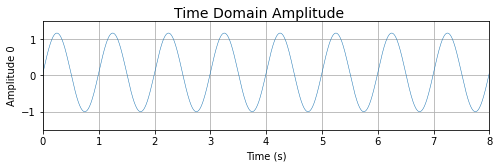

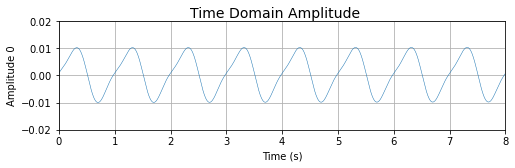

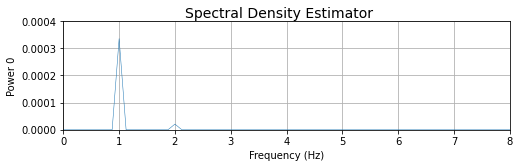

In [2]:
f0 = 1.0                         # excitation frequency (kg)
F0 = 1.0                         # excitation amplitude (N)

m  = 1.0                         # system mass (kg)
fn = 2.0                         # system natural frequency (Hz)
zt = 0.01                        # system damping ratio (nondim)

F  =  F0*MRPy.harmonic(NX=1, N=1024, Td=8, f0=1, phi=0)  # MRPy harmonic function
F  = (F + 2*F0)**1.05 - 2*F0

u  =  F.sdof_Fourier(fn, 0.01)/m                         # frequency domain solution

f0 =  F.plot_time(0, figsize=(8,2), axis_t=(0, 8, -1.50, 1.50  ))
f1 =  u.plot_time(1, figsize=(8,2), axis_t=(0, 8, -0.02, 0.02  ))
f2 =  u.plot_freq(2, figsize=(8,2), axis_f=(0, 8,  0.00, 0.0004))


## 2. Reological models <a name="section_2"></a> 

### 2.1. The general linear model  <a name="section_21"></a> 

The damped spring-mass system depicted at the beginning of this notebook, with a single spring in parallel
with a single damper, is one amongst many possible models for the reological behavior of linear systems.
In general, the equilibrium equation may be written as:

$$ m \ddot{u} + r(u, t) = F(t) $$

where $r(u, t)$ is a time function abridging both _restitutive_ and _reactive_ forces, which obviously 
depend on the system response itself, $u(t)$. In general, it can be stated that a linear reological model
is the solution of the equation:

$$ \left(a_0 + a_1\frac{\partial}{\partial t} + a_2\frac{\partial^2}{\partial t^2} + \dots \right) r(t) =
   \left(b_0 + b_1\frac{\partial}{\partial t} + b_2\frac{\partial^2}{\partial t^2} + \dots \right) u(t) $$

If we apply a Fourier Transform to this equation, with $\mathscr{F} \left\{ r(t) \right\} = R(\omega)$
and $\mathscr{F} \left\{ u(t) \right\} = U(\omega)$, after some algebraic manipulation we arrive 
at the following general relation:

$$ R(\omega) = K(\omega) \left[ 1 + i\mu(\omega) \right] U(\omega)$$

what in short means that there will be an _in phase_ and an _out of phase_ force to displacement response. 
Each reological models will have its own $K(\omega)$ and $\mu(\omega)$ functions. 
It is important to observe the importance of the Fourier Transform approach here, 
which makes possible the solution of equilibrium equation in frequency domain without
the need of solving an integral-differential equation in time domain.


### 2.2. The Kevin-Voigt model  <a name="section_22"></a> 

The parallel spring-damper system, commonly used for elastic structures in
Civil Engineering, is known as _Kelvin-Voigt_ model.

<img src="images/Kelvin_Voigt_diagram.svg" alt="Kelvin-Voigt" width="160px"/>

In time domain the model is formulated as:

$$ r(t) = c\dot{u}(t) + ku(t)  $$

while its properties are:

\begin{align*}
  K(\omega) &= k \\
\mu(\omega) &= -\frac{c\omega}{k} 
\end{align*}

We will be always using this model, unless otherwise explicitly stated.


### 2.3. The Maxwell model  <a name="section_23"></a> 

The series spring-damper system, the most basic representation of a viscous
material, is known as _Maxwell_ model.

<img src="images/Maxwell_diagram.svg" alt="Maxwell" width="240px"/>

In time domain the model is stated as:

$$ r(t) + \frac{c}{k} \; \dot{r}(t) = c\dot{u}(t)$$

while its properties are:

\begin{align*}
  K(\omega) &=  \frac{c^2 k}{c^2 \omega^2 + k^2} \omega^2 \\
\mu(\omega) &= -\frac{k}{c\omega}
\end{align*}

Observe that this model implies the possibility (almost a certainty) 
of a system non-zero final response. Furthermore, for zero excitation frequency
(what means a static load) the displacement will become infinity.


### 2.3. The Zener (standard) model  <a name="section_24"></a> 

A more complex reological model is known as the Zener (or standard) model. 
There are two versions for these model, as illustrated below.

<table align="center">
 <tr>
   <td align="center"><img src="images/Zener_Maxwell_diagram.svg" alt="Zener-Maxwell" width="200px"/></td>
   <td align="center"><img src="images/Zener_Kelvin_diagram.svg"  alt="Zener-Kelvin"  width="180px"/></td>
 </tr>
 <tr>
   <td align="center"> The Zener model (Maxwell version) </td>
   <td align="center"> The Zener model (Kelvin version)  </td>
 </tr>
</table> <br>



The time domain equation for the Maxwell version of Zener model is:

$$ r(t) + \frac{c}{k_2} \; \dot{r}(t) = k_1 u(t) + \frac{c(k_1 + k_2)}{k_2} \; \dot{u}(t) $$

while the equation for the Kelvin version is:

$$ r(t) + \frac{c}{k_1 + k_2} \; \dot{r}(t) = \frac{k_1 k_2}{k_1 + k_2} \; u(t) + \frac{c k_1}{k_1 + k_2} \; \dot{u}(t) $$

As an exercise, it is suggested the derivation of frequency domain functions, $K(\omega)$ and $\mu(\omega)$
for these two Zener model versions.


## 3. Equilibrium in frequency domain <a name="section_3"></a> 

After choosing a suitable reological model, we may now go back to the linear dynamic equilibrium equation:

$$ m \ddot{u} + r(u, t) = F(t) $$

and apply a Fourier transform to both sides of equation:

$$ -\omega^2 U(\omega) + \frac{1}{m} \; R(\omega) = F(\omega) $$

where $\mathscr{F} \left\{ F(t)/m \right\} = F(\omega)$.

After replacing the expression for the choosen $R(\omega)$, the system response $U(\omega)$ can be 
calculated as a function of excitation $F(\omega)$, and transformed back to time domain (if required).
One must be aware that this is complex algebra and the solution will have both an _in phase_ and 
an _out of phase_ components. 

In the following we will do the math for the most used Kevin-Voigt model. The equilibrium in 
frequency domain is:

$$ -\omega^2 U(\omega) + \frac{k}{m} \; \left( 1 - i\frac{c\omega}{k} \right) U(\omega) = F(\omega) $$

Now we isolate $U(\omega)$ and recall that $\omega_{\rm n}^2 = k/m$ and that $\zeta = c/(2m\omega_{\rm n}) $, what gives:

$$ U(\omega) = H(\omega) F(\omega) $$

where:

$$ H(\omega) = \frac{1}{\omega_{\rm n}^2} \; \left[ \frac{1}{(1 - \beta^2) - i(2\zeta\beta)} \right]$$

is called the _system mechanical admittance_, with $\beta = \omega / \omega_{\rm n}$ being 
a nondimensional frequency. 

These expressions allow a straightforward solution of the equilibrium equation in time domain 
(although its complex algebra). The mechanical admittance can be understood as a frequency 
dependent flexibility, for as the excitation frequency goes to zero (static condition) the 
admittance goes to $1/\omega_{\rm n}^2$, which is the flexibility coefficient 
(inverse of the stiffness coefficient, $\omega_{\rm n}^2$) with unity mass.

In the expression above it can also be observed that for undamped systems, $\zeta = 0$, the 
admittance, and consequently the system response, will rise to infinity when the excitation
frequency equals the system natural frequency, $\omega = \omega_{\rm n}$. This condition is
called _resonance_, and must be always avoided in structural systems design.

The class ``MRPy`` has a method ``sdof_Fourier()`` that is an implementation of this
solution in frequency domain (for Kevin-Voigt model). It requires no inicial condition,
for in Fourier analysis the numerical approach (where signals must have a finite duration)
assumes the signal is always periodic.

The example below compares the solutions with ``sdof_Fourier()`` and  ``sdof_Duhamel()``
for a linear system subject to a harmonic load. Observe the difference due to 
the initial conditions in time domain approach. The two responses become the same
after some acceleration time in the solution with Duhamel. This difference between
the two solution methods is exactly the system response to some initial conditions.


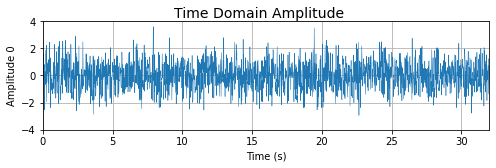

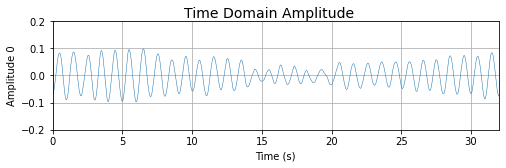

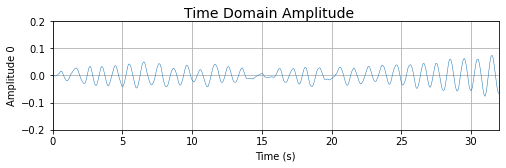

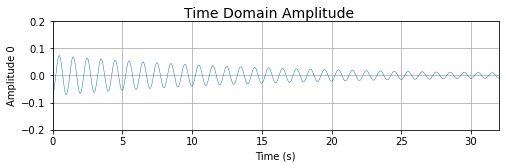

In [3]:
m   =  1.0                  # system mass (kg)
fn  =  1.0                  # system natural frequency (Hz)
zt  =  0.01                 # system damping ratio (nondim)

F   =  MRPy.white_noise(1, 2048, Td=32)   # 32 seconds white noise
F   = (F - F.mean())/F.std()              # unit variance

# Uncomment the following line for padding zeros to force same result
# F  =  F.double().double()

uF =  F.sdof_Fourier(1, 0.01)/m          # 1Hz, 1% damping, 1kg mass
uD =  F.sdof_Duhamel(1, 0.01, 0, 0)/m    # zero initial conditions

uE =  uF - uD                            # solutions difference

f2 =   F.plot_time(2, figsize=(8,2), axis_t=(0, 32, -4.0, 4.0))
f3 =  uF.plot_time(3, figsize=(8,2), axis_t=(0, 32, -0.2, 0.2))
f4 =  uD.plot_time(4, figsize=(8,2), axis_t=(0, 32, -0.2, 0.2))
f5 =  uE.plot_time(5, figsize=(8,2), axis_t=(0, 32, -0.2, 0.2))


There are many areas in engineering analysis where design codes define dynamic loads as power spectra.
For instance, surface irregularities in pavements, earthquake accelerations, wind speeds, etc.
In these cases, the equation:

$$ U(\omega) = H(\omega) F(\omega) $$

which preserve phase information, is replaced by:

$$ S_U(\omega) = \lvert H(\omega) \rvert^2 S_F(\omega) $$

where, instead of the complex Fourier transforms, the (real) spectral densities are used.
In this new equation, the absolute squared mechanical admittance becomes:

$$ \lvert H(\omega) \rvert^2 = \frac{1}{\omega_{\rm n}^4} \; \left[ \frac{1}{(1 - \beta^2)^2 + (2\zeta\beta)^2} \right]$$

with $\beta = \omega/\omega_{\rm n}$.
The square root of the expression between brackets is also called _dynamic amplification factor_, $A(\beta, \zeta)$:

$$ A(\beta, \zeta) = \sqrt{\frac{1}{(1 - \beta^2)^2 + (2\zeta\beta)^2}} $$

plotted below for some typical values of the damping ratio.


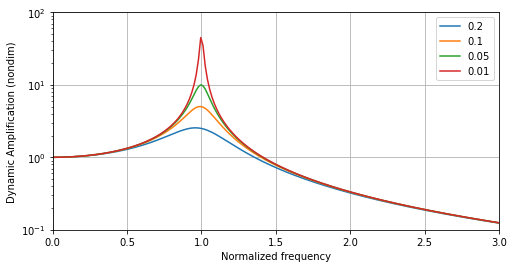

In [4]:
bt =  np.linspace(0, 3, 200)
zt = [0.20, 0.10, 0.05, 0.01]

plt.figure(6, figsize=(8,4))

for z in zt:
    A  = np.sqrt(1/((1 - bt**2)**2 + (2*z*bt)**2))
    f6 = plt.semilogy(bt, A)

plt.legend(zt)
plt.axis([0, 3, 0.1, 100])
plt.ylabel('Dynamic Amplification (nondim)')
plt.xlabel('Normalized frequency')
plt.grid(True)


The most important features of the dynamic amplification factor are:

* The factor represents the dynamic response increase with respect to the static response to a harmonic loading: <br> <br> $$ F(t) = F_{\rm max} \sin(\omega t + \theta) $$ <br> such that <br> $$ u_{\rm max} = A(\beta, \zeta) \; \frac{F_{\rm max}}{m \omega_{\rm n}^2} $$ <br> where we recall that $m \omega_{\rm n}^2$ is the stiffness coefficient and the phase information is lost.
* For very low frequencies the amplification becomes $A(\beta, \zeta) = 1$, what means static response.
* For $\beta \approx 1$ the amplification attains its maximum, which is approximatelly $A(1, \zeta) = 1/(2\zeta)$. This means, for instance, that for a typical damping ratio, $\zeta = 1$%, the dynamic response is amplified approximately 50 times with respect to the static response.

Lets take a look at this theory by running an example.


Static displacement would be:  0.025m
Peak of dynamic displacement:  1.261m
Amplification factor is:      49.8 


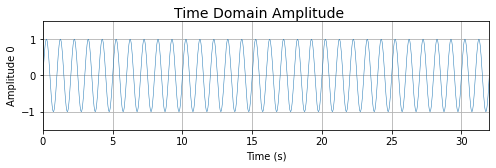

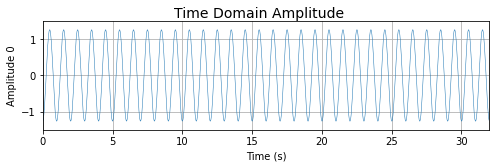

In [5]:
m   =  1.0                  # system mass (kg)
fn  =  1.0                  # system natural frequency (Hz)
zt  =  0.01                 # system damping ratio (nondim)
k   =  m*(2*np.pi*fn)**2    # implied stiffness

Td  =  32                   # load duration (s)
fs  =  32                   # sampling rate (Hz)
N   =  Td*fs                # signal length
f0  =  1.0                  # excitation frequency (Hz)
F0  =  1.0                  # excitation amplitude (N)
phi =  0.0                  # phase angle (rad)

F   =  F0*MRPy.harmonic(1, N, fs, f0=f0, phi=phi)   # harmonic loading

ue  =  F0/k                        # static response
ud  =  F.sdof_Fourier(fn, zt)/m    # dynamic response
up  =  ud[0].max()                 # peak response

f7 =  F.plot_time(7, figsize=(8,2), axis_t=(0,32,-1.5,1.5))
f8 = ud.plot_time(8, figsize=(8,2), axis_t=(0,32,-1.5,1.5))

print('Static displacement would be: {0:6.3f}m'.format(ue))
print('Peak of dynamic displacement: {0:6.3f}m'.format(up))
print('Amplification factor is:      {0:4.1f} '.format(up/ue))


## 4. Example of application <a name="section_4"></a> 

The aerodynamic force over a bluff body due to wind speed turbulence 
can be calculated as:

$$ F(z, t) = \frac{1}{2} \rho V^2(z, t) C_{\rm D} A $$

where $z$ is the height above ground, $\rho$ is the air density, $V(z,t)$ 
is the wind speed at height $z$, and the product $C_{\rm D} A$ refers
to the aerodynamic characteristics of the body.
It can be shown that the spectral density of this aerodynamic force
is related to the spectral density of the (fluctuating part) of the wind
speed through:

$$ S_F(z, f) = \left [
               \frac{2\bar{F}(z)}{\bar{V}(z)} \right ]^2 S_v(z, f)$$

where $f$ is the frequency, $\bar{F}(z)$ is the mean force at height $z$,
and $\bar{V}(z)$ is the mean wind speed at height $z$. 

The wind speed turbulence, $v(t)$, may be modelled according to Harris' spectral density, $S_V(f)$:

$$ \frac{f S_V(f)}{\sigma_V^2} = \frac{0.6 Y}{\left( 2 + Y^2 \right)^{5/6}}$$
with:
\begin{align*}
 Y          &= 1800 f \;/\; \bar{V}_{10}     \\
 \sigma_V^2 &= 6.66 \; c_{\rm as} \; \bar{V}_{10}^2
\end{align*}

where $\sigma_V^2$ is the wind speed variance, $c_{\rm as}$ is the surface drag coefficient and $\bar{V}_{10}$ is the mean wind speed at 10m height.


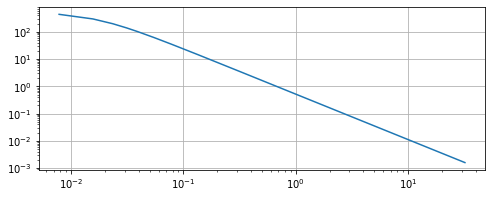

In [6]:
cas =  6.5e-3                      # NBR-6123 category II
V10 =  20.                         # mean speed at 10m (m/s)
sV2 =  6.66*cas*(V10**2)           # wind speed variance   

fs  =  64.                         # samplig rate
N   =  8192                        # length of sample
M   =  N//2 + 1                    # length of periodogram
df  =  fs/M                        # frequency step

f   =  np.linspace(0, fs/2, M)     # frequency axis
Y   =  1800*f[1:]/V10              # avoiding zero division

SV0       =  np.zeros((2, M))
SV0[0,1:] =  0.6*sV2*Y/((2 + Y**2)**(5/6))/f[1:]
SV0[1,1:] =  SV0[0,1:]  # (replicating)

plt.figure(6, figsize=(8, 3))
plt.loglog(f[1:], SV0[0,1:]);
plt.grid(True)


## 5. Assignment <a name="section_5"></a> 

1. Calcular as funções $K(\omega)$ e $\mu(\omega)$ para o modelo reológico de Zener (escolha uma das
   duas versões, Maxwell ou Kelvin).
2. Aplique as funções acima na equação de equilíbrio dinâmico no domínio da frequência e deduza
   a correspondente função de admitância mecânica.
3. Plote esta admitância em função da frequência adimensionalizada.
4. Apresente a expressão da frequência natural de vibração livre para este modelo.
4. Relatório com deduções, gráficos e resultados (nome do arquivo T6_xxxxxxxx.ipynb).

Prazo: 03 de junho de 2020.
